# Étude de la conservation de l'énergie et de la continuité de la température résolue selon la forme de l'équation

In [1]:
import sys
import os

lib_path = os.path.realpath(os.path.join(os.getcwd(), '..'))
if lib_path not in sys.path:
    sys.path = [lib_path] + sys.path

In [2]:
from src.main import *
from src.plot_fields import *

## Paramètres de la simulation

Ici on va réaliser une simulation sans diffusion pour différentes écritures de notre équation thermique.

La résolution se fait à chaque fois en WENO avec Euler explicite en temps.

In [3]:
Delta = 10.
lda_1 = 1.
lda_2 = 10.
rho_cp_1 = 1.
rho_cp_2 = 100.
markers = np.array([0.4 * Delta, 0.6 * Delta])
alpha = (markers[1] - markers[0])/Delta
v = 1.
dt = 1.
fo = 0.5

t_fin = 1.
dx = 10.**-1.
cfl = 0.5
schema = 'weno'
Formulation = [Problem, ProblemConserv2]

## Étude selon la formulation de l'équation pour un schéma temps Euler

Le premier cas correspond à une formulation en température, les 2 suivant à une formulation en énergie. Dans le premier on utilise $\rho C_p^{n+1}$ dans le 2ième on calcule $\rho C_p^* = \rho C_p^n + \Delta t \times \frac{1}{V_{cell}} \int_{S}{\rho C_p^n \underline{v}\cdot \underline{n} dS}$

0.0004999999999999999
Cas : convection, euler, weno, dx = 0.1, cfl = 0.005 dE*/dt* = -0.000000
0.0004999999999999999
Forme conservative boniou, Cas : convection, euler, weno, dx = 0.1, cfl = 0.005 dE*/dt* = 0.000000


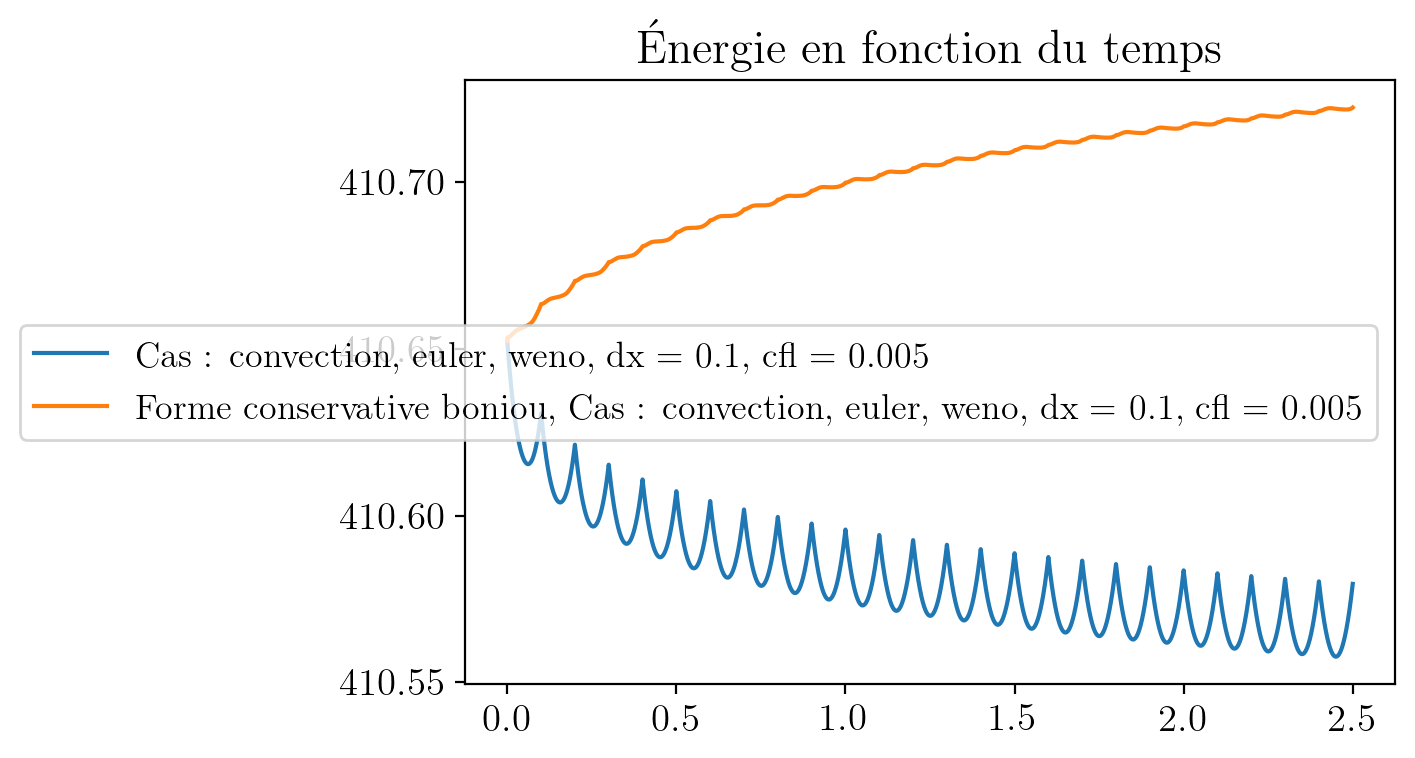

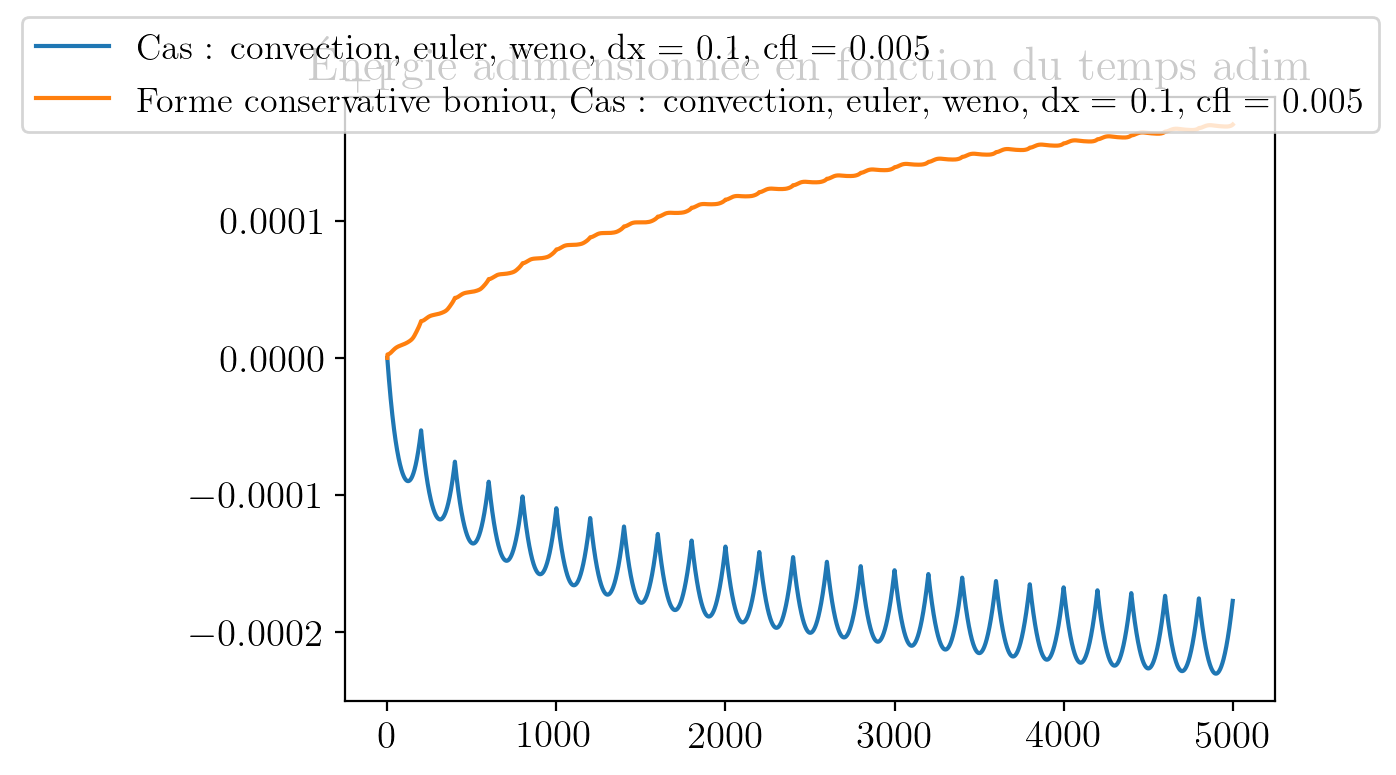

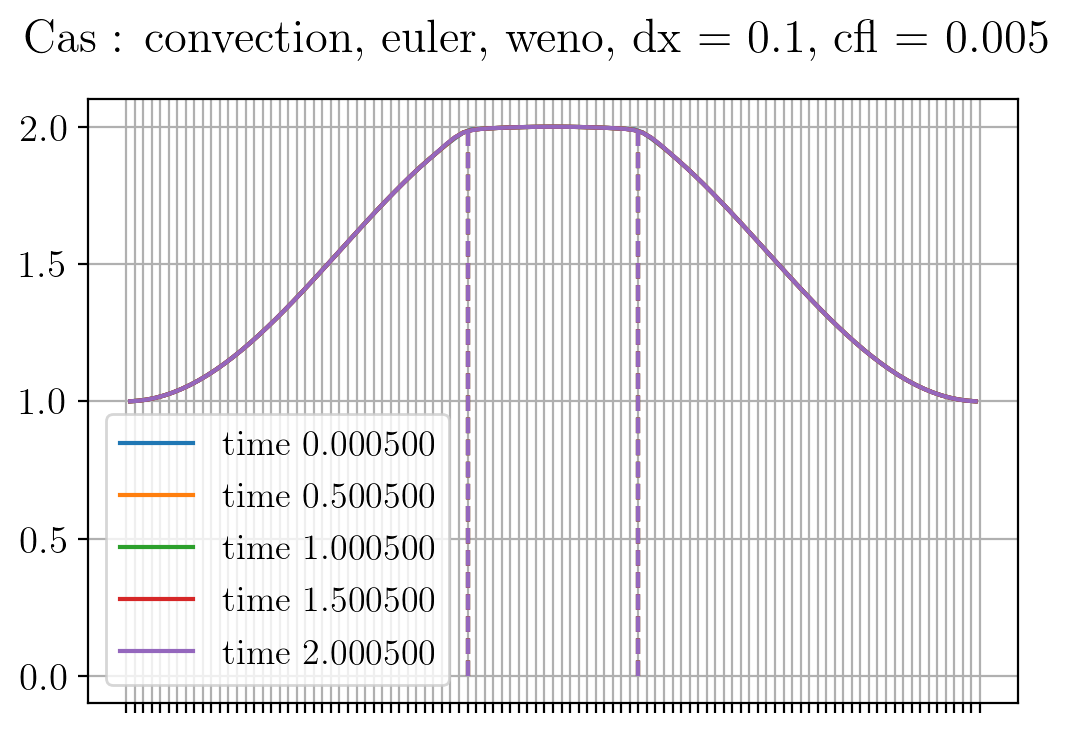

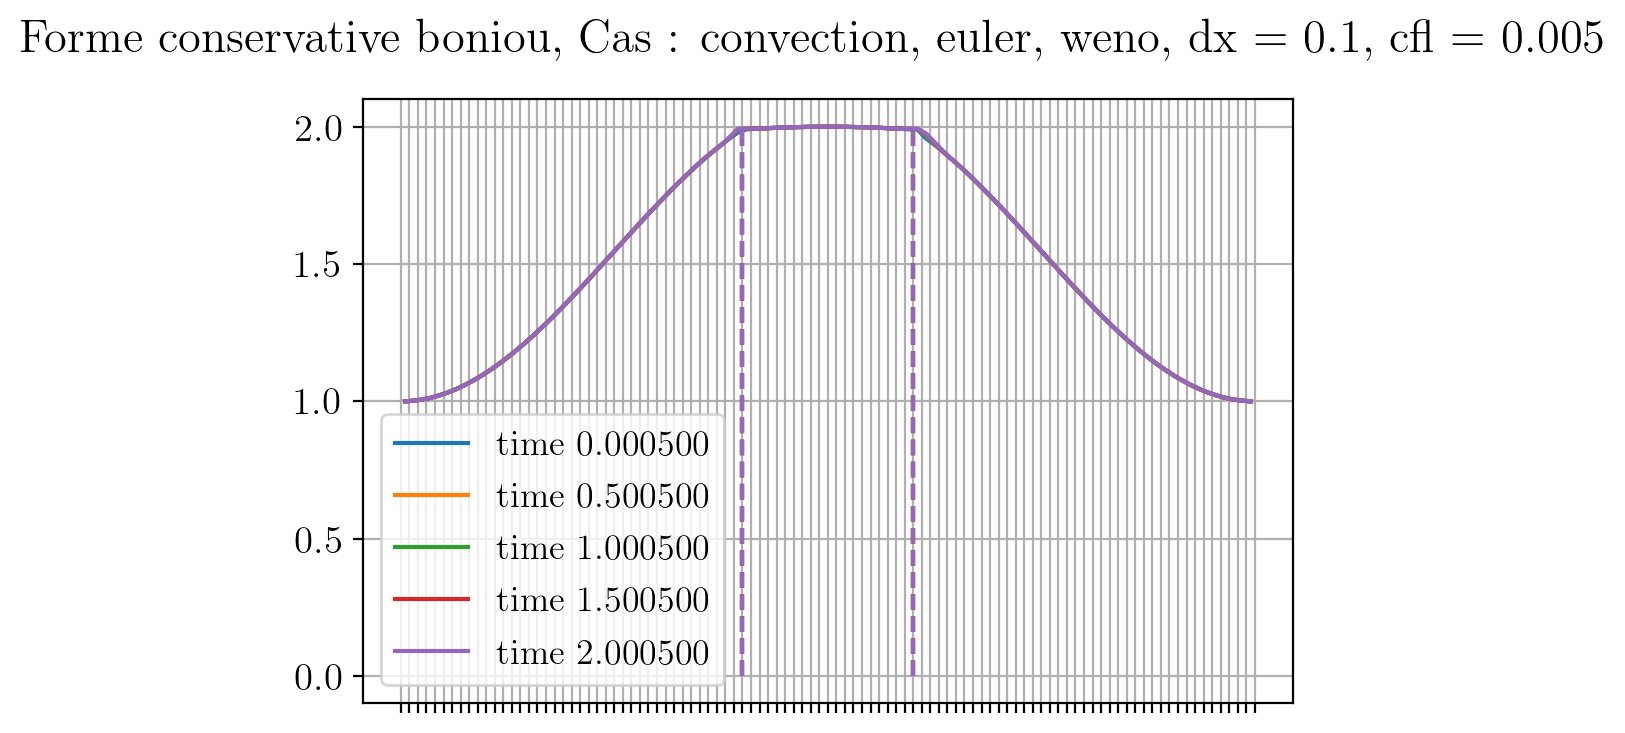

In [4]:
fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')
fig2, ax2 = plt.subplots(1)
ax2.set_title('Énergie adimensionnée en fonction du temps adim')
for form in Formulation:
    x, T = get_T(dx=dx, Delta=Delta, markers=markers, lda_1=lda_1, lda_2=lda_2)
    T = T + 1.
    prob = form(Delta, dx, lda_1, lda_2, rho_cp_1, rho_cp_2, markers, T, v, dt, cfl, fo,
                diff=0., schema=schema, time_scheme='euler')
    E0 = prob.compute_energy()
    t, e = prob.timestep(n=5000, number_of_plots=5, debug=False, plotter=Plotter('decale'))
    l = ax1.plot(t, e, label=prob.name)
    ax1.legend()
    n = len(e)
    i0 = int(n/5)
    ax2.plot(t/prob.dt, e / E0, label=prob.name)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
    # par Dt / rho_cp_l T_l V
    print(prob.name, 'dE*/dt* = %f' % dedt_adim)
le = fig2.legend()

## Étude selon la formulation de l'équation pour un schéma temps RK4

Le premier cas correspond à une formulation en température, le suivant à une formulation en énergie. Dans cette formulation en énergie on écrit :
    
$$dT = \frac{1}{V} \int_{\Delta t}{\frac{1}{\rho C_p} \left[ T\oint_{S}{\rho C_p \underline{v}\cdot\underline{n} dS} - \oint_{S}{\rho C_p T \underline{v}\cdot\underline{n} dS} + \oint_{S}{\lambda \nabla T \cdot\underline{n} dS}\right]dt}$$

0.0004999999999999999
Cas : convection, rk4, weno, dx = 0.1, cfl = 0.005 dE*/dt* = -0.000000
0.0004999999999999999
Forme conservative boniou, Cas : convection, rk4, weno, dx = 0.1, cfl = 0.005 dE*/dt* = 0.000000


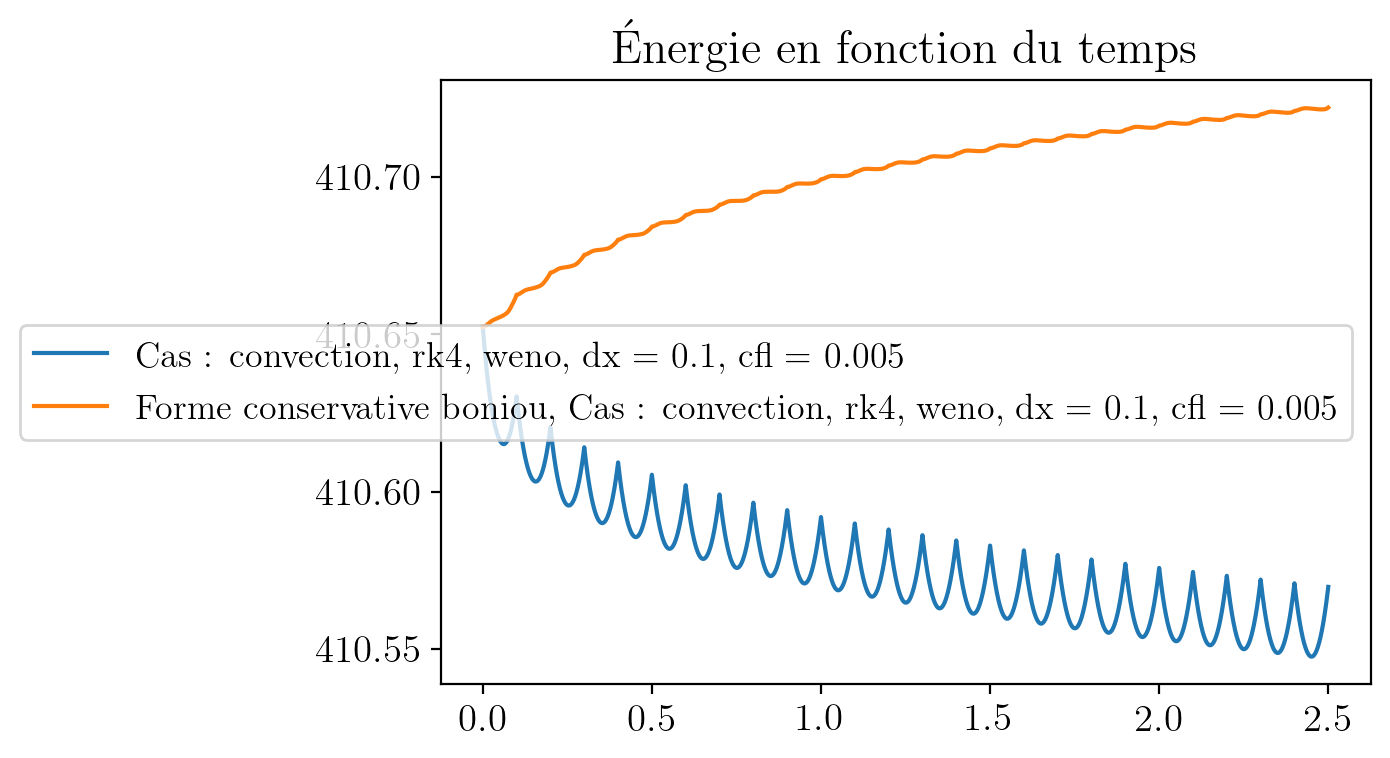

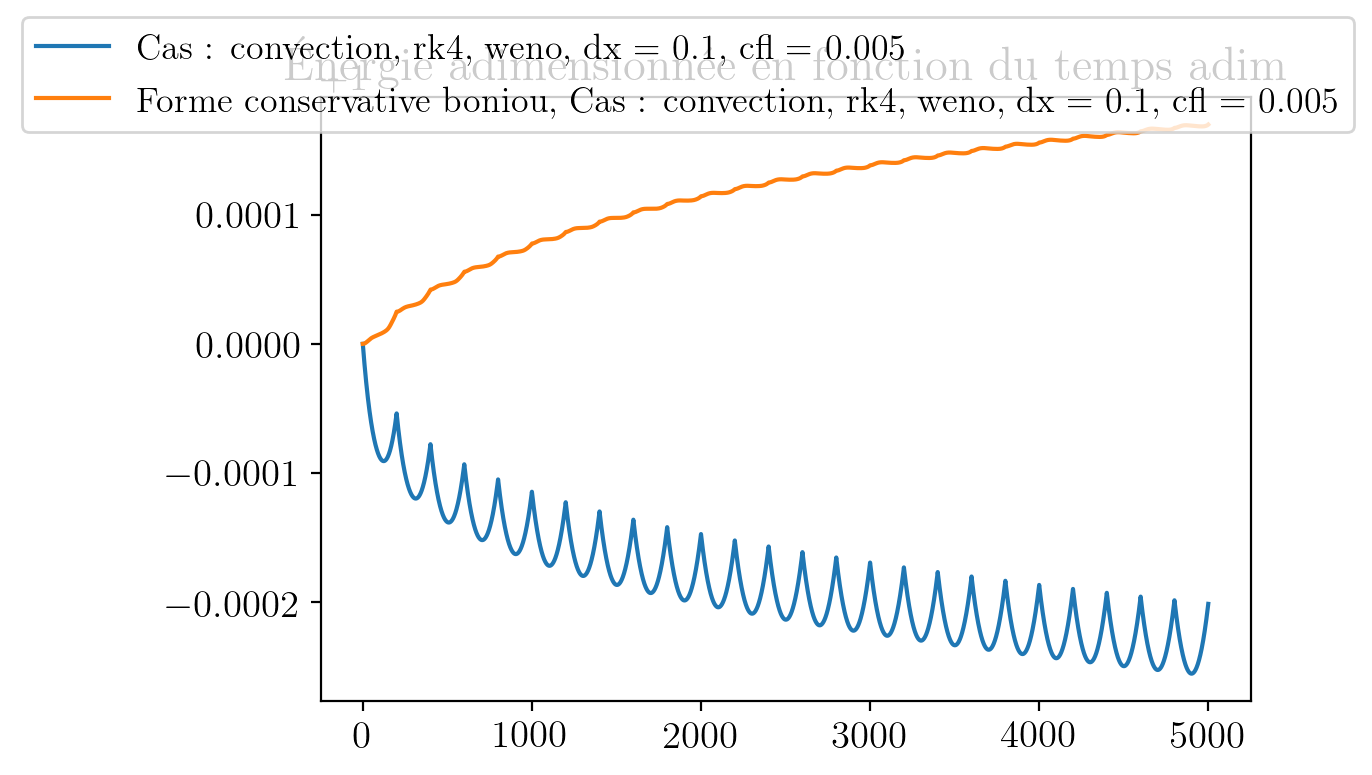

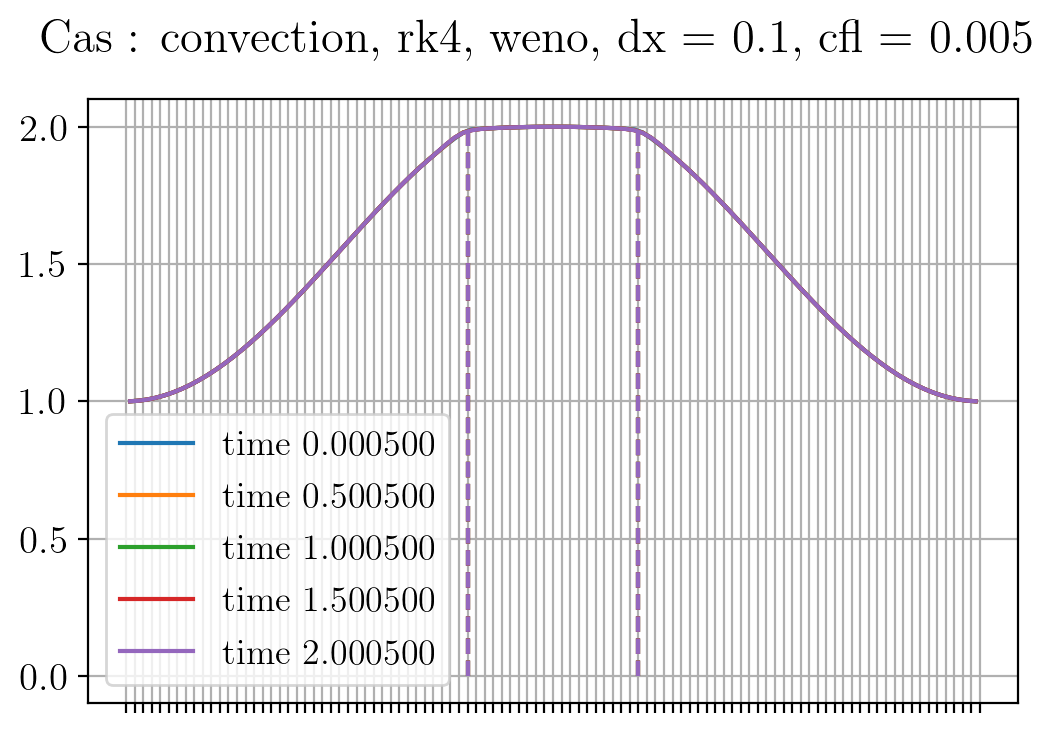

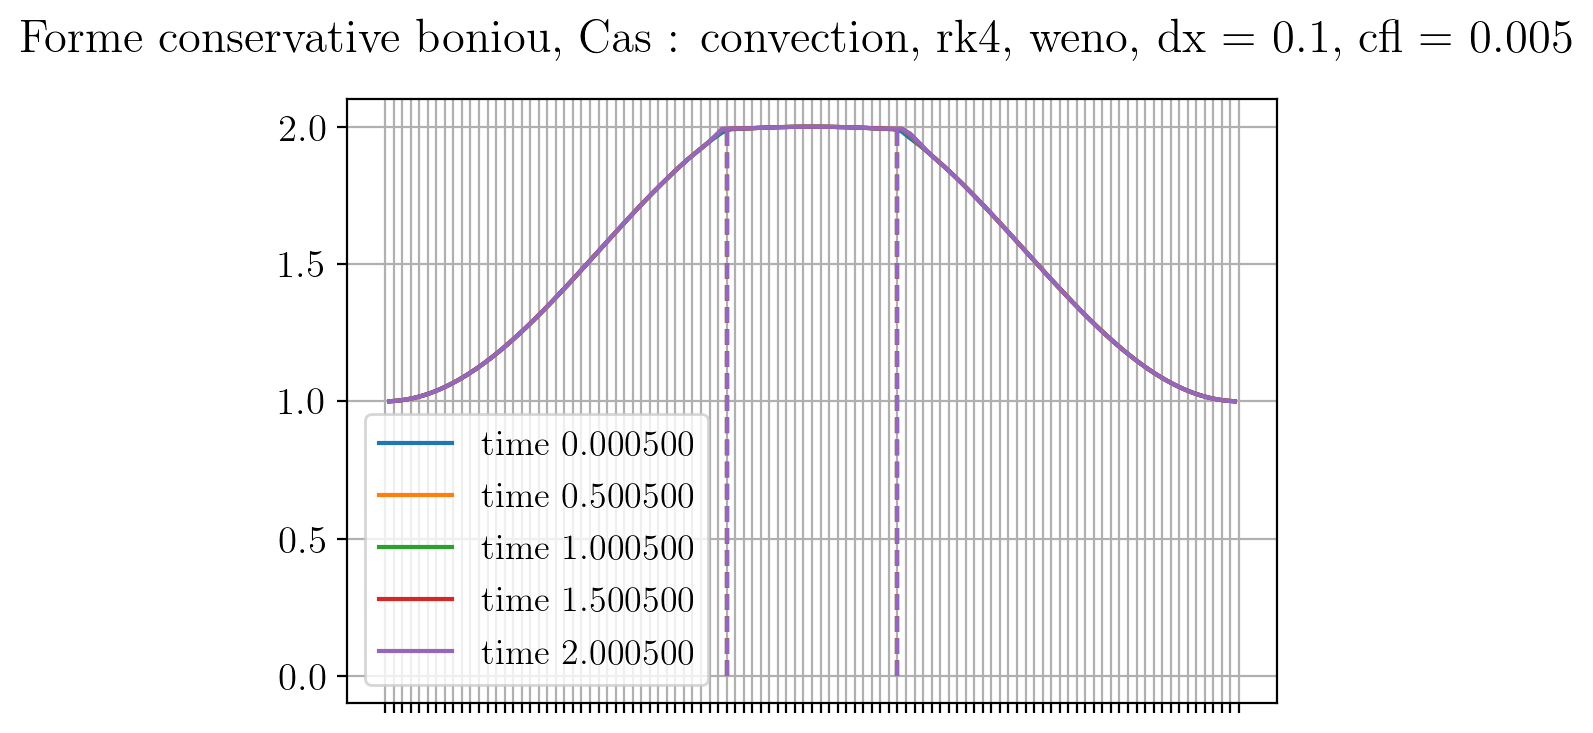

In [5]:
fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')
fig2, ax2 = plt.subplots(1)
ax2.set_title('Énergie adimensionnée en fonction du temps adim')
for form in Formulation:
    x, T = get_T(dx=dx, Delta=Delta, markers=markers, lda_1=lda_1, lda_2=lda_2)
    T = T + 1.
    prob = form(Delta, dx, lda_1, lda_2, rho_cp_1, rho_cp_2, markers, T, v, dt, cfl, fo,
                diff=0., schema=schema, time_scheme='rk4')
    E0 = prob.compute_energy()
    t, e = prob.timestep(n=5000, number_of_plots=5, debug=False, plotter=Plotter('decale'))
    l = ax1.plot(t, e, label=prob.name)
    ax1.legend()
    n = len(e)
    i0 = int(n/5)
    ax2.plot(t/prob.dt, e / E0, label=prob.name)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
    # par Dt / rho_cp_l T_l V
    print(prob.name, 'dE*/dt* = %f' % dedt_adim)
le = fig2.legend()